# Prep

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
#from mlxtend.plotting import plot_decision_regions
from sklearn.dummy import DummyClassifier
from scipy.stats import uniform, randint
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
#extract a shareable link from google drive where the cleaned dataset resides
#original google drive link - https://drive.google.com/file/d/19C6RISwVpnc-hCVWNhvd0PyLCBgDKsG5/view?usp=sharing
#change the format of the link by noting the ID and assign it to a variable link

data = 'hmeq.csv'

In [6]:
upsampled = pd.read_csv(data)

In [8]:
upsampled

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [10]:
# Drop rows with fewer than 3 non-null columns (ID + 2 fields = too sparse)
min_valid_fields = 13  # adjust as needed
df_cleaned = upsampled[upsampled.notnull().sum(axis=1) >= min_valid_fields]

# Reset index for cleanliness
df_cleaned = df_cleaned.reset_index(drop=True)

print(f"Original rows: {upsampled.shape[0]}")
print(f"Cleaned rows: {df_cleaned.shape[0]}")


Original rows: 5960
Cleaned rows: 3364


In [323]:
df_cleaned = df_cleaned.drop("REASON", axis=1)
df_cleaned = df_cleaned.drop("JOB", axis=1)

In [325]:
df_cleaned.to_csv('cleaned_hmeq.csv', index=False)

In [12]:
df_numeric = upsampled

X = df_cleaned.drop('BAD', axis=1)
y = df_cleaned['BAD']

X = X.dropna()
y = y.loc[X.index]  # Keep target aligned



In [26]:
X.corr()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
LOAN,1.000000,0.272924,0.378724,0.076359,-0.024263,-0.067468,0.066484,0.051264,0.075893,0.157379
MORTDUE,0.272924,1.000000,0.865265,-0.103307,-0.042590,-0.035903,0.137741,0.036424,0.320759,0.185446
VALUE,0.378724,0.865265,1.000000,-0.021113,-0.045910,-0.068415,0.197697,-0.006878,0.215466,0.130928
YOJ,0.076359,-0.103307,-0.021113,1.000000,-0.055824,0.021976,0.230511,-0.045865,-0.001290,-0.051864
DEROG,-0.024263,-0.042590,-0.045910,-0.055824,1.000000,0.147825,-0.053741,0.181596,0.065897,0.035200
DELINQ,-0.067468,-0.035903,-0.068415,0.021976,0.147825,1.000000,0.011583,0.003523,0.122612,0.038251
CLAGE,0.066484,0.137741,0.197697,0.230511,-0.053741,0.011583,1.000000,-0.089076,0.201759,-0.050553
NINQ,0.051264,0.036424,-0.006878,-0.045865,0.181596,0.003523,-0.089076,1.000000,0.077538,0.157328
CLNO,0.075893,0.320759,0.215466,-0.001290,0.065897,0.122612,0.201759,0.077538,1.000000,0.143613
DEBTINC,0.157379,0.185446,0.130928,-0.051864,0.035200,0.038251,-0.050553,0.157328,0.143613,1.000000


<Axes: >

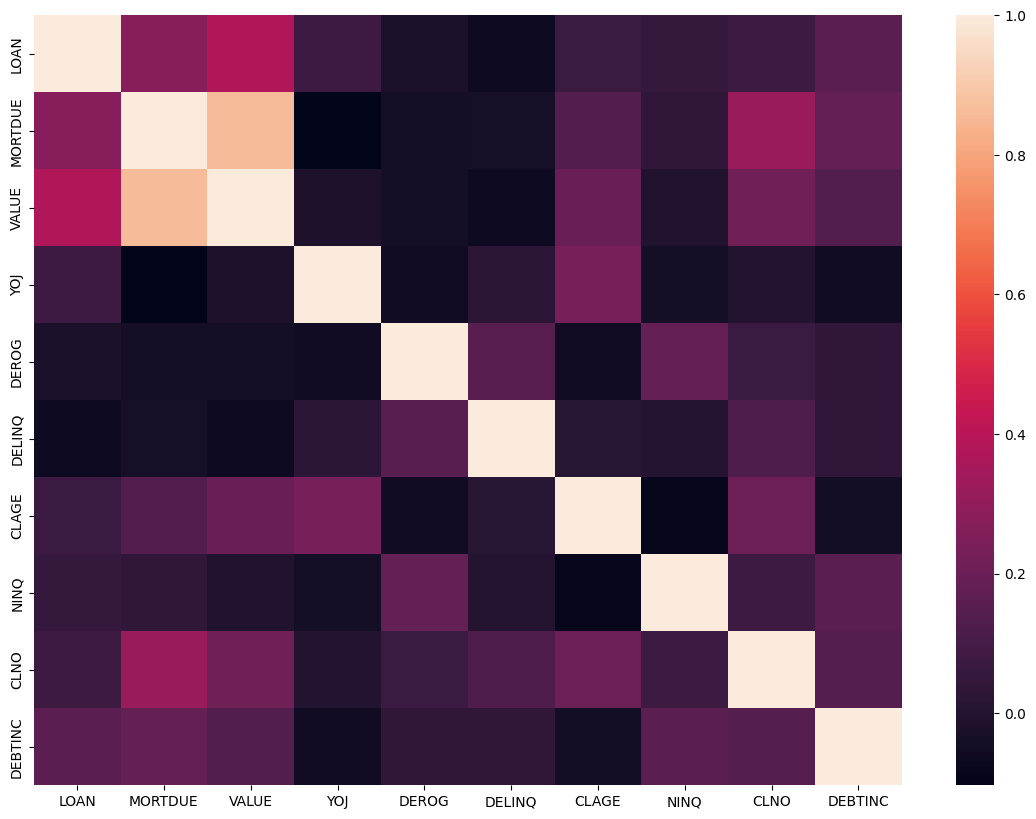

In [28]:
plt.figure(figsize = (14,10))
sns.heatmap(X.corr())

In [247]:
y = y.loc[X.index]  # Keep target aligned

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Scaling the data using standard scaler**

In [252]:
# Scaling the data using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Taking the empty lists to get the accuracy, precision, recall and f1_score**

In [255]:
accuracy = []
precision=[]
recall=[]
f1_score=[]

In [257]:
from sklearn.dummy import DummyClassifier
baseline_clf = DummyClassifier(strategy="most_frequent")
#baseline_clf.fit(X_train_scaled, y_train)
baseline_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [259]:
#baseline_pred = baseline_clf.predict(X_test_scaled)
baseline_pred = baseline_clf.predict(X_test)

In [261]:
baseline_accuracy = np.mean(baseline_pred == y_test)
print("Baseline accuracy:", baseline_accuracy)
accuracy.append(baseline_accuracy)

Baseline accuracy: 0.9167904903417533


**A comparison with a naive classification technique (baseline)**

In [264]:
cl_report_naive = classification_report(y_test, baseline_pred, output_dict = True)
precision.append(cl_report_naive['weighted avg']['precision'])
recall.append(cl_report_naive['weighted avg']['recall'])
f1_score.append(cl_report_naive['weighted avg']['f1-score'])
print(classification_report(y_test, baseline_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       617
           1       0.00      0.00      0.00        56

    accuracy                           0.92       673
   macro avg       0.46      0.50      0.48       673
weighted avg       0.84      0.92      0.88       673



In [266]:
conf_matrix_baseline = confusion_matrix(y_test, baseline_pred)
conf_matrix_baseline

array([[617,   0],
       [ 56,   0]], dtype=int64)

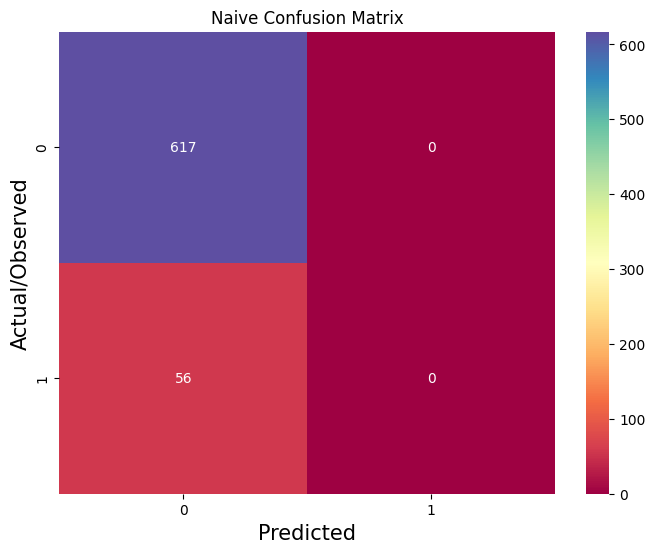

In [268]:
plt.figure(figsize = (8,6))

sns.heatmap(conf_matrix_baseline,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("Naive Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Training the models using the best hyper parameters that we obtained in all the 4 models and predicting the test data.**

# Linear Classifier using the best hyper parameters

In [272]:
from sklearn.linear_model import SGDClassifier
SGD_linear = SGDClassifier(loss='hinge', alpha= 0.1, learning_rate='optimal', random_state=0)
#SGD_linear.fit(X_train_scaled, y_train)
SGD_linear.fit(X_train, y_train)

SGDClassifier(alpha=0.1, random_state=0)

In [274]:
X_train_scaled = X_train
X_test_scaled = X_test

In [276]:
y_pred_linear = SGD_linear.predict(X_test_scaled)
linear_acc = accuracy_score(y_test, y_pred_linear)
accuracy.append(linear_acc)
print("Accuracy of Linear model for test data is",linear_acc)

Accuracy of Linear model for test data is 0.9167904903417533


In [278]:
cl_report_linear = classification_report(y_test, y_pred_linear, output_dict=True)
precision.append(cl_report_linear['weighted avg']['precision'])
recall.append(cl_report_linear['weighted avg']['recall'])
f1_score.append(cl_report_linear['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       617
           1       0.00      0.00      0.00        56

    accuracy                           0.92       673
   macro avg       0.46      0.50      0.48       673
weighted avg       0.84      0.92      0.88       673



In [280]:
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
conf_matrix_linear

array([[617,   0],
       [ 56,   0]], dtype=int64)

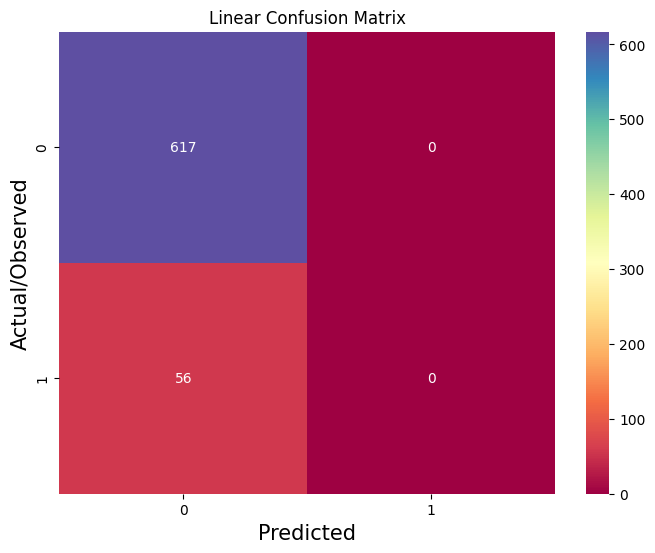

In [282]:
plt.figure(figsize = (8,6))

sns.heatmap(conf_matrix_linear,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("Linear Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**KNN using the best hyper parameters**

In [285]:
from sklearn.neighbors import KNeighborsClassifier
#Train Model and Predict
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [287]:
y_pred_knn = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, y_pred_knn)
accuracy.append(knn_acc)
print("Accuracy of knn model for test data is",knn_acc)

Accuracy of knn model for test data is 0.9182763744427934


In [289]:
cl_report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
precision.append(cl_report_knn['weighted avg']['precision'])
recall.append(cl_report_knn['weighted avg']['recall'])
f1_score.append(cl_report_knn['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       617
           1       0.60      0.05      0.10        56

    accuracy                           0.92       673
   macro avg       0.76      0.53      0.53       673
weighted avg       0.89      0.92      0.89       673



In [291]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_knn

array([[615,   2],
       [ 53,   3]], dtype=int64)

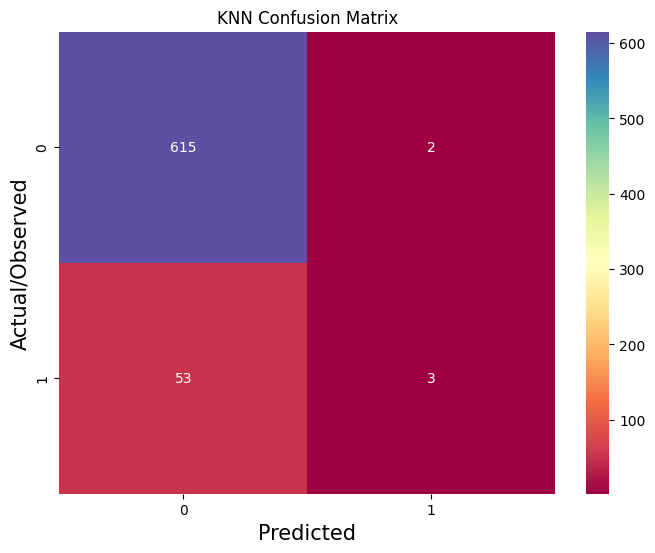

In [293]:
plt.figure(figsize = (8,6))

sns.heatmap(conf_matrix_knn,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("KNN Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Random Forest Classifier using the best hyper parameters**

In [296]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= None, n_estimators= 201, random_state=42)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=8, max_features=None, n_estimators=201,
                       random_state=42)

In [298]:
y_pred_rfc = rfc.predict(X_test_scaled)
acc_rfc = accuracy_score(y_test,y_pred_rfc)
accuracy.append(acc_rfc)
print("Accuracy for Random Forest for test data",acc_rfc)

Accuracy for Random Forest for test data 0.9479940564635958


In [300]:
cl_report_rfc = classification_report(y_test, y_pred_rfc, output_dict=True)
precision.append(cl_report_rfc['weighted avg']['precision'])
recall.append(cl_report_rfc['weighted avg']['recall'])
f1_score.append(cl_report_rfc['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       617
           1       1.00      0.38      0.55        56

    accuracy                           0.95       673
   macro avg       0.97      0.69      0.76       673
weighted avg       0.95      0.95      0.94       673



In [302]:
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
conf_matrix_rfc

array([[617,   0],
       [ 35,  21]], dtype=int64)

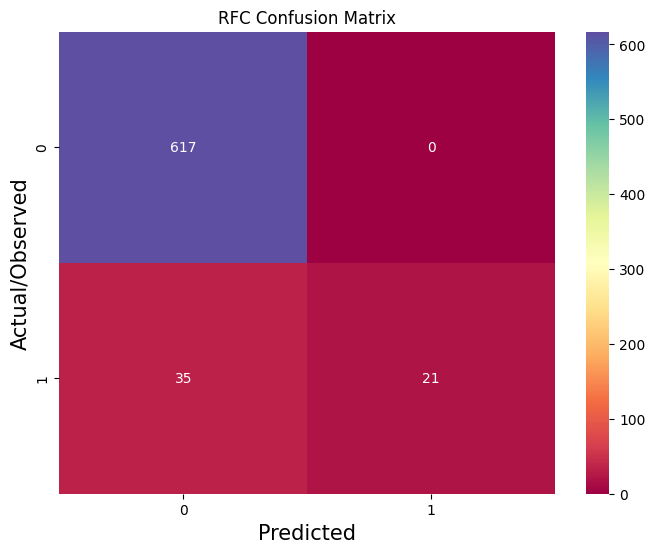

In [304]:
plt.figure(figsize = (8,6))

sns.heatmap(conf_matrix_rfc,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("RFC Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Decision Tree using the best hyper parameters**

In [307]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 1, min_samples_split= 8, random_state=42)
dec_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=8, random_state=42)

In [309]:
y_pred_tree = dec_tree.predict(X_test_scaled)
acc_tree = accuracy_score(y_test, y_pred_tree)
accuracy.append(acc_tree)
print("Best Accuracy for Decision Tree for test data",acc_tree)

Best Accuracy for Decision Tree for test data 0.9465081723625557


In [311]:
cl_report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
precision.append(cl_report_tree['weighted avg']['precision'])
recall.append(cl_report_tree['weighted avg']['recall'])
f1_score.append(cl_report_tree['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       617
           1       0.81      0.46      0.59        56

    accuracy                           0.95       673
   macro avg       0.88      0.73      0.78       673
weighted avg       0.94      0.95      0.94       673



In [313]:
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
conf_matrix_tree

array([[611,   6],
       [ 30,  26]], dtype=int64)

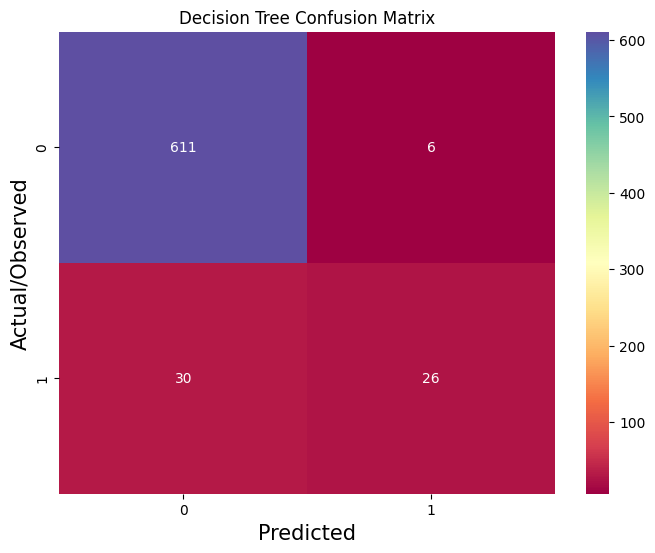

In [315]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_tree,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Support Vector Machine with Linear Kernel**

In [ ]:
from sklearn.svm import SVC

# Training the linear SVM model
svm_linear = SVC(kernel='linear', C=10)
svm_linear.fit(X_train_scaled, y_train)

In [101]:
y_pred_linear = svm_linear.predict(X_test_scaled)
acc_linear = accuracy_score(y_test, y_pred_linear)
accuracy.append(acc_linear)
print("Best Accuracy for SVM linear for test data",acc_linear)

Best Accuracy for SVM linear for test data 0.9197622585438335


In [103]:
cl_report_linear = classification_report(y_test, y_pred_linear, output_dict=True)
precision.append(cl_report_linear['weighted avg']['precision'])
recall.append(cl_report_linear['weighted avg']['recall'])
f1_score.append(cl_report_linear['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       617
           1       0.75      0.05      0.10        56

    accuracy                           0.92       673
   macro avg       0.84      0.53      0.53       673
weighted avg       0.91      0.92      0.89       673



In [105]:
conf_matrix_svm_lin = confusion_matrix(y_test, y_pred_linear)
conf_matrix_svm_lin

array([[616,   1],
       [ 53,   3]], dtype=int64)

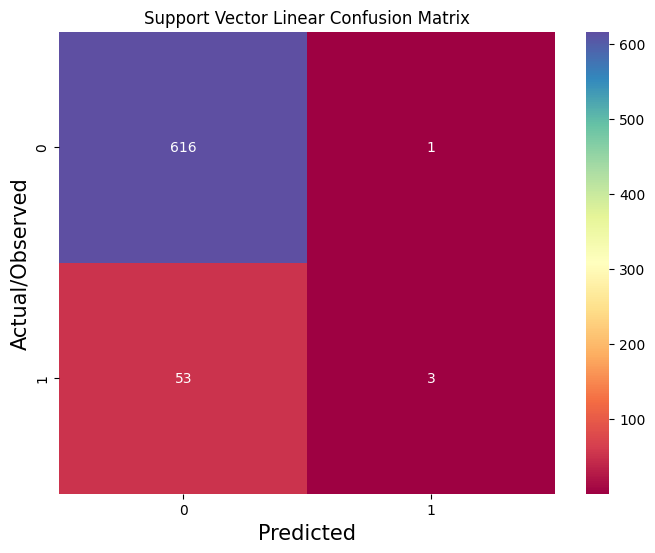

In [107]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_svm_lin,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("Support Vector Linear Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Support Vector Machine with Non Linear Kernel**

In [110]:
# Training the non-linear SVM model
svm_non_linear = SVC(kernel='rbf', C=10)
svm_non_linear.fit(X_train_scaled, y_train)

SVC(C=10)

In [112]:
y_pred_nl = svm_non_linear.predict(X_test_scaled)
acc_nl = accuracy_score(y_test, y_pred_nl)
accuracy.append(acc_nl)
print("Best Accuracy for SVM non linear for test data",acc_nl)

Best Accuracy for SVM non linear for test data 0.9167904903417533


In [114]:
cl_report_nl = classification_report(y_test, y_pred_nl, output_dict=True)
precision.append(cl_report_nl['weighted avg']['precision'])
recall.append(cl_report_nl['weighted avg']['recall'])
f1_score.append(cl_report_nl['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_nl))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       617
           1       0.00      0.00      0.00        56

    accuracy                           0.92       673
   macro avg       0.46      0.50      0.48       673
weighted avg       0.84      0.92      0.88       673



In [116]:
conf_matrix_svm_non_lin = confusion_matrix(y_test, y_pred_nl)
conf_matrix_svm_non_lin

array([[617,   0],
       [ 56,   0]], dtype=int64)

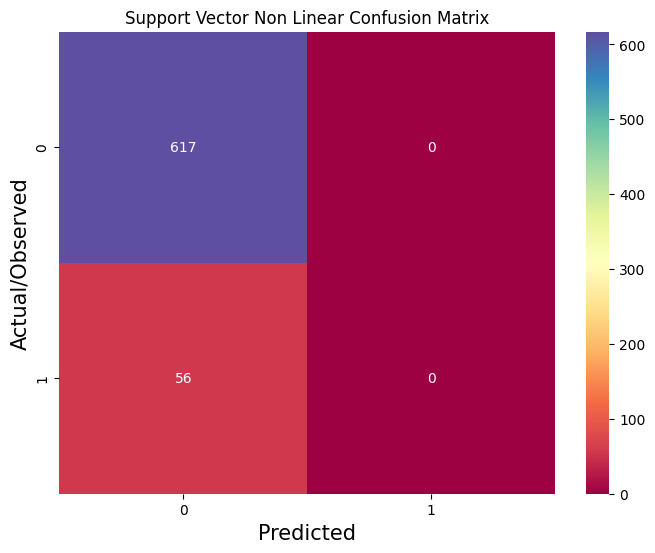

In [118]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_svm_non_lin,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("Support Vector Non Linear Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Best Models by using the variable selection using LASSO**

**Random Forest using variable selection with Lasso**

In [122]:
features_lasso=['loan_int_rate', 'loan_percent_income', 'previous_loan_defaults_on_file']

In [124]:
X_best = X[features_lasso]

KeyError: "None of [Index(['loan_int_rate', 'loan_percent_income',\n       'previous_loan_defaults_on_file'],\n      dtype='object')] are in the [columns]"

In [126]:
X_train_b, X_test_b, y_train, y_test = train_test_split(X_best, y, test_size=0.3, random_state=42)

NameError: name 'X_best' is not defined

In [128]:
X_train_b = scaler.fit_transform(X_train_b)
X_test_b = scaler.transform(X_test_b)

NameError: name 'X_train_b' is not defined

In [130]:
rfc_lasso = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'auto', n_estimators= 201, random_state=42)

In [132]:
rfc_lasso.fit(X_train_b, y_train)

NameError: name 'X_train_b' is not defined

In [134]:
y_pred_rfc_lasso = rfc_lasso.predict(X_test_b)
acc_rfc_lasso = accuracy_score(y_test, y_pred_rfc_lasso)
accuracy.append(acc_rfc_lasso)
print(f" The testing data accuracy for the Random forest model is {acc_rfc_lasso}")

NameError: name 'X_test_b' is not defined

In [136]:
cl_report_rfc_lasso = classification_report(y_test, y_pred_rfc_lasso, output_dict=True)
precision.append(cl_report_rfc_lasso['weighted avg']['precision'])
recall.append(cl_report_rfc_lasso['weighted avg']['recall'])
f1_score.append(cl_report_rfc_lasso['weighted avg']['f1-score'])

NameError: name 'y_pred_rfc_lasso' is not defined

In [138]:
print(classification_report(y_test, y_pred_rfc_lasso))

NameError: name 'y_pred_rfc_lasso' is not defined

In [140]:
# getting the confusion matrix on test data based on true positive values
conf_matrix_rfc_lasso = confusion_matrix(y_test, y_pred_rfc_lasso)
conf_matrix_rfc_lasso

NameError: name 'y_pred_rfc_lasso' is not defined

In [142]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_rfc_lasso,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("RFC lasso Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

NameError: name 'conf_matrix_rfc_lasso' is not defined

<Figure size 800x600 with 0 Axes>

**Best Models by using the variable selection as Bidirectional elimination as the wrapper method**

**RFC using Bidirectional features**

In [146]:
features_wrapper=['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'HDF', 'PWF']

In [148]:
X_w = upsampled[features_wrapper]

KeyError: "None of [Index(['Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'HDF',\n       'PWF'],\n      dtype='object')] are in the [columns]"

In [150]:
X_train_w, X_test_w, y_train, y_test = train_test_split(X_w, y, test_size=0.2, random_state=42)

NameError: name 'X_w' is not defined

In [152]:
X_train_w = scaler.fit_transform(X_train_w)
X_test_w = scaler.transform(X_test_w)
rfc_w = RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'auto', n_estimators= 201, random_state=42)
rfc_w.fit(X_train_w, y_train)

NameError: name 'X_train_w' is not defined

In [154]:
y_pred_rfc_w = rfc_w.predict(X_test_w)
acc_rfc_w = accuracy_score(y_test, y_pred_rfc_w)
accuracy.append(acc_rfc_w)
print(f" The testing data accuracy for the RFC using bidirectional features model is {acc_rfc_w}")

NameError: name 'rfc_w' is not defined

In [156]:
cl_report_rfc_w = classification_report(y_test, y_pred_rfc_w, output_dict=True)
precision.append(cl_report_rfc_w['weighted avg']['precision'])
recall.append(cl_report_rfc_w['weighted avg']['recall'])
f1_score.append(cl_report_rfc_w['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_rfc_w))

NameError: name 'y_pred_rfc_w' is not defined

In [158]:
# getting the confusion matrix on test data based on true positive values
conf_matrix_rfc_w = confusion_matrix(y_test, y_pred_rfc_w)
conf_matrix_rfc_w

NameError: name 'y_pred_rfc_w' is not defined

In [160]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_rfc_w,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("rfc bidirectional Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

NameError: name 'conf_matrix_rfc_w' is not defined

<Figure size 800x600 with 0 Axes>

**KNN using Bidirectional features**

In [163]:
features_wrapper2= ['UDI', 'Torque [Nm]', 'Tool wear [min]', 'HDF', 'PWF']

In [165]:
X_w2 = upsampled[features_wrapper2]

KeyError: "None of [Index(['UDI', 'Torque [Nm]', 'Tool wear [min]', 'HDF', 'PWF'], dtype='object')] are in the [columns]"

In [167]:
X_train_w, X_test_w, y_train, y_test = train_test_split(X_w2, y, test_size=0.2, random_state=42)

NameError: name 'X_w2' is not defined

In [169]:
X_train_w = scaler.fit_transform(X_train_w)
X_test_w = scaler.transform(X_test_w)

NameError: name 'X_train_w' is not defined

In [171]:
#Instantiate the KNN model
from mlxtend.feature_selection import SequentialFeatureSelector
knn_model = KNeighborsClassifier()

# Number of features to select
n_features_to_select = 5  # Adjust this based on your preference or after experimentation

# Forward feature selection using SequentialFeatureSelector
sfs = SequentialFeatureSelector(knn_model,
                                 k_features=n_features_to_select,
                                 forward=True,
                                 floating=False,
                                 verbose=2,
                                 scoring='accuracy',
                                 cv=5)
sfs.fit(X_train_w, y_train)


ModuleNotFoundError: No module named 'mlxtend'

In [173]:
selected_feature_indices = sfs.k_feature_idx_

# Extract the selected features from the training and testing data
X_train_selected = X_train_w[:, list(selected_feature_indices)]
X_test_selected = X_test_w[:, list(selected_feature_indices)]

NameError: name 'sfs' is not defined

In [175]:
knn_model.fit(X_train_selected, y_train)

# Predict using the trained KNN model
y_pred_knn_w = knn_model.predict(X_test_selected)

NameError: name 'knn_model' is not defined

In [177]:
# Evaluate the accuracy
acc_knn_w = accuracy_score(y_test, y_pred_knn_w)
accuracy.append(acc_knn_w)
print(f" The testing data accuracy for the KNN using bidirectional features model is {acc_knn_w}")

NameError: name 'y_pred_knn_w' is not defined

In [179]:
cl_report_knn_w = classification_report(y_test, y_pred_knn_w, output_dict=True)
precision.append(cl_report_knn_w['weighted avg']['precision'])
recall.append(cl_report_knn_w['weighted avg']['recall'])
f1_score.append(cl_report_knn_w['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_knn_w))

NameError: name 'y_pred_knn_w' is not defined

In [181]:
# getting the confusion matrix on test data based on true positive values
conf_matrix_knn_w = confusion_matrix(y_test, y_pred_knn_w)
conf_matrix_knn_w

NameError: name 'y_pred_knn_w' is not defined

In [183]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_knn_w,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("knn bidirectional Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

NameError: name 'conf_matrix_knn_w' is not defined

<Figure size 800x600 with 0 Axes>

In [185]:
pip install xgboost


**XGBoost Model**

In [187]:
import xgboost as xgb

# Training the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [190]:
# Predictions
y_pred_xgboost = xgb_model.predict(X_test_scaled)

In [192]:
acc_xgboost = accuracy_score(y_test, y_pred_xgboost)
accuracy.append(acc_xgboost)

In [194]:
print("Best Accuracy for XGBoost model for test data",acc_xgboost)

Best Accuracy for XGBoost model for test data 0.9598811292719168


In [196]:
cl_report_xgboost = classification_report(y_test, y_pred_xgboost, output_dict=True)
precision.append(cl_report_xgboost['weighted avg']['precision'])
recall.append(cl_report_xgboost['weighted avg']['recall'])
f1_score.append(cl_report_xgboost['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       617
           1       0.97      0.54      0.69        56

    accuracy                           0.96       673
   macro avg       0.96      0.77      0.83       673
weighted avg       0.96      0.96      0.95       673



In [198]:
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)
conf_matrix_xgboost

array([[616,   1],
       [ 26,  30]], dtype=int64)

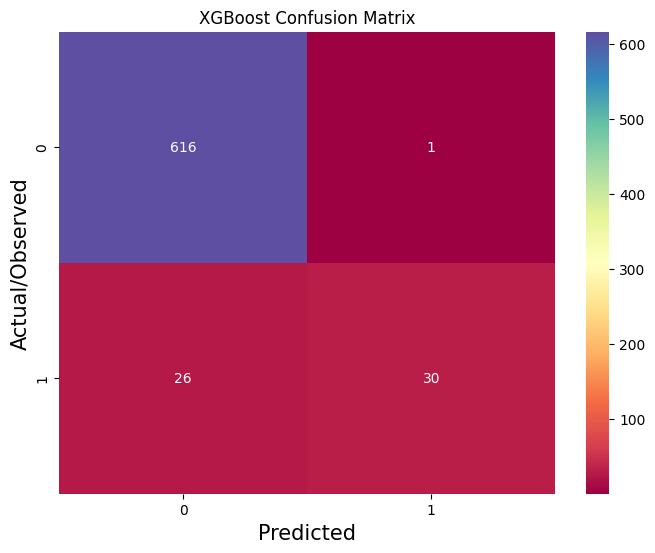

In [200]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_xgboost,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("XGBoost Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Extreme Machine Learning Model**

In [203]:
from sklearn.neural_network import MLPClassifier
# Create and train the ELM model
elm_model = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=1000, random_state=42)
elm_model.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=1000,
              random_state=42)

In [205]:
# Make predictions on the test set
y_pred_elm = elm_model.predict(X_test_scaled)

In [207]:
acc_elm = accuracy_score(y_test, y_pred_elm)
accuracy.append(acc_elm)
print("Best Accuracy for ELM model for test data",acc_elm)

Best Accuracy for ELM model for test data 0.9167904903417533


In [209]:
cl_report_elm = classification_report(y_test, y_pred_elm, output_dict=True)
precision.append(cl_report_elm['weighted avg']['precision'])
recall.append(cl_report_elm['weighted avg']['recall'])
f1_score.append(cl_report_elm['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_elm))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       617
           1       0.00      0.00      0.00        56

    accuracy                           0.92       673
   macro avg       0.46      0.50      0.48       673
weighted avg       0.84      0.92      0.88       673



In [211]:
conf_matrix_elm = confusion_matrix(y_test, y_pred_elm)
conf_matrix_elm

array([[617,   0],
       [ 56,   0]], dtype=int64)

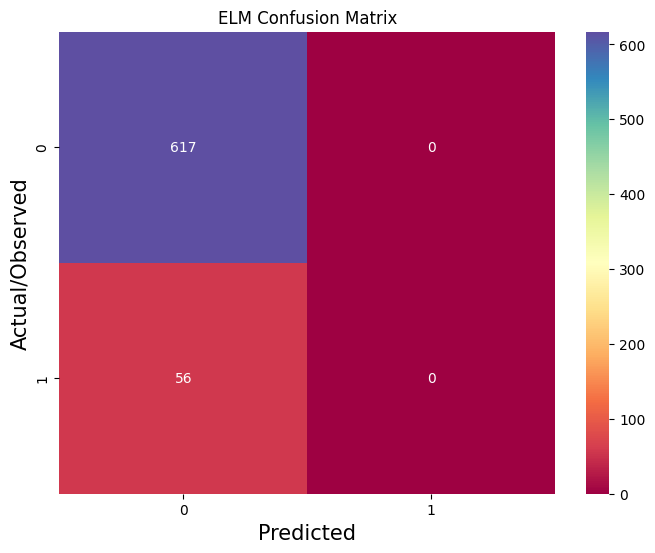

In [213]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_elm,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("ELM Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Deep learning model with two layers**

In [216]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import VotingClassifier
# Create a sequential model
model = Sequential()

In [218]:
# Add the first hidden layer with input shape (assuming X_train has feature dimensions)
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Add the second hidden layer
model.add(Dense(units=32, activation='relu'))

# Output layer with sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [220]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8365 - loss: 293.2269 - val_accuracy: 0.4785 - val_loss: 43.6827
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8274 - loss: 63.9537 - val_accuracy: 0.9168 - val_loss: 130.6509
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8503 - loss: 67.5424 - val_accuracy: 0.2600 - val_loss: 73.8794
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8002 - loss: 48.4929 - val_accuracy: 0.5349 - val_loss: 11.7881
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8289 - loss: 42.4617 - val_accuracy: 0.9168 - val_loss: 97.3230
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8304 - loss: 59.0146 - val_accuracy: 0.1278 - val_loss: 140.0066
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7975 - loss: 53.7056 - val_accuracy: 0.9049 - val_loss: 11.7684
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8589 - loss: 39.6399 - val_accuracy: 

In [222]:
# Make predictions
y_pred_deep = (model.predict(X_test_scaled) > 0.5).astype("int32")

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [224]:
acc_deep = accuracy_score(y_test, y_pred_deep)
accuracy.append(acc_deep)
print("Best Accuracy for deep learning model for test data",acc_deep)

Best Accuracy for deep learning model for test data 0.13818722139673106


In [226]:
cl_report_deep = classification_report(y_test, y_pred_deep, output_dict=True)
precision.append(cl_report_deep['weighted avg']['precision'])
recall.append(cl_report_deep['weighted avg']['recall'])
f1_score.append(cl_report_deep['weighted avg']['f1-score'])
print(classification_report(y_test, y_pred_deep))

              precision    recall  f1-score   support

           0       0.91      0.07      0.12       617
           1       0.08      0.93      0.15        56

    accuracy                           0.14       673
   macro avg       0.50      0.50      0.14       673
weighted avg       0.84      0.14      0.13       673



In [228]:
conf_matrix_deep = confusion_matrix(y_test, y_pred_deep)
conf_matrix_deep

array([[ 41, 576],
       [  4,  52]], dtype=int64)

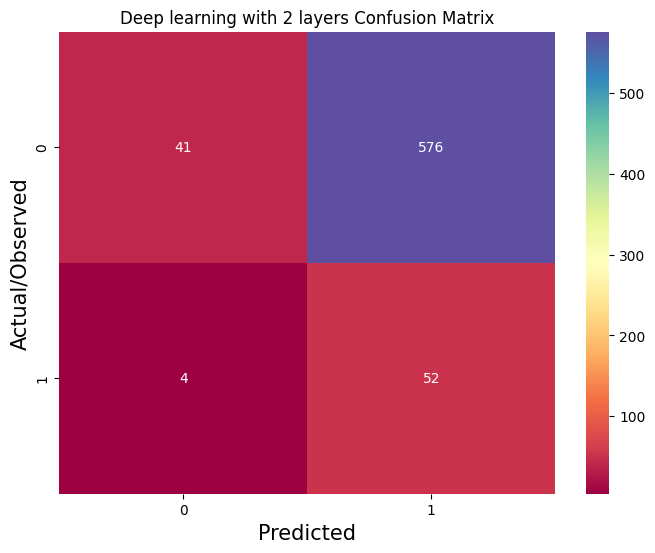

In [230]:
# Confusion matrix heat map
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_deep,
            annot=True,
            cmap="Spectral", fmt = "g")
plt.title("Deep learning with 2 layers Confusion Matrix")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

**Plotting the accuracy graph for all the models**

In [233]:
accuracy

[0.9167904903417533,
 0.9167904903417533,
 0.9182763744427934,
 0.9479940564635958,
 0.9465081723625557,
 0.9197622585438335,
 0.9167904903417533,
 0.9598811292719168,
 0.9167904903417533,
 0.13818722139673106]

In [235]:
models = ["Naive", "Linear Classifier","KNN", "Random Forest", "Decision Tree", "SVM Linear", "SVM non-Linear","XGBoost","ELM","Deep Learning MOdel"]


In [237]:
models = ["Naive", "Linear Classifier","KNN", "Random Forest", "Decision Tree", "SVM Linear", "SVM non-Linear","Bi_RFC", "Bi_KNN","XGBoost","ELM","Deep Learning MOdel"]

ValueError: x and y must have same first dimension, but have shapes (12,) and (10,)

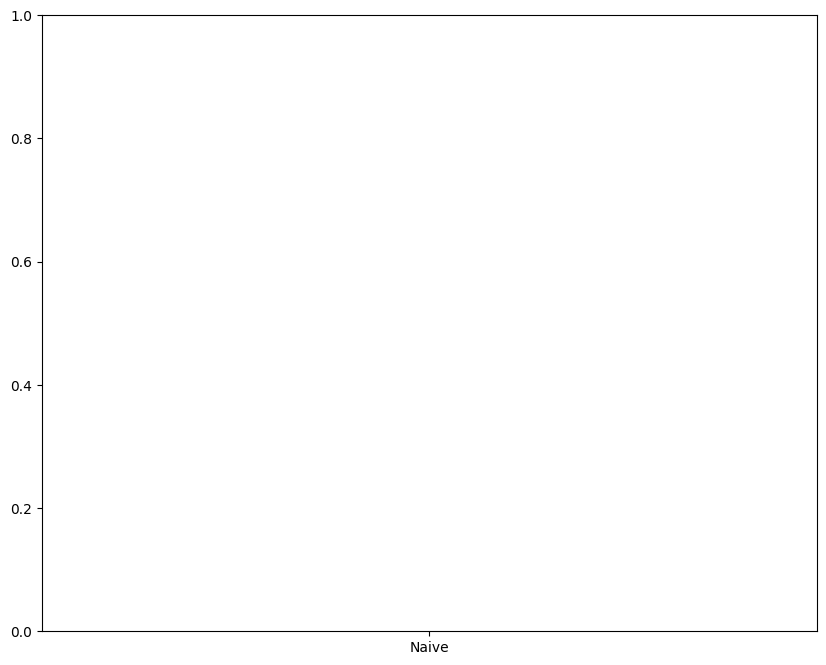

In [239]:
fig = plt.figure(figsize=(10, 8))
plt.plot(models,accuracy, marker='o')
plt.title('Accuracy Scores on Respective model on Test Data', fontsize=15)
plt.grid()
plt.show()

ValueError: All arrays must be of the same length

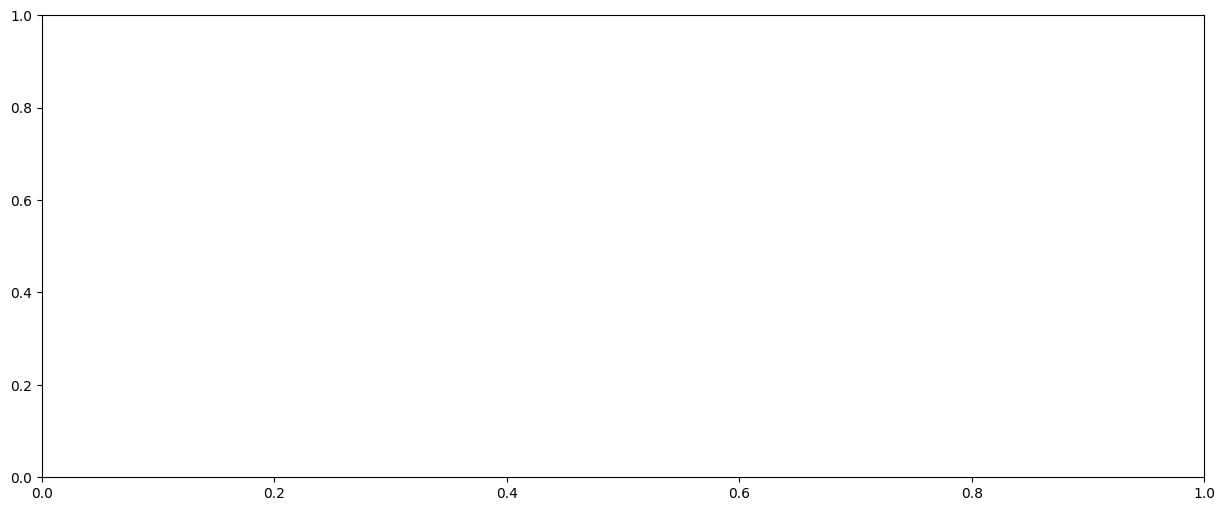

In [241]:
# sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 6))
ax = sns.barplot(x=models, y=accuracy)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)
plt.xticks(range(len(models)), models)
plt.title(f"Accuracy plot for {len(accuracy)} models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

In [219]:
print(precision,recall,f1_score)

[0.8405048031810725, 0.8405048031810725, 0.8939768308850352, 0.9507857865614089, 0.9414907056906349, 0.9160323255905479, 0.8405048031810725, 0.9606718773146411, 0.8405048031810725, 0.8401632254773681] [0.9167904903417533, 0.9167904903417533, 0.9182763744427934, 0.9479940564635958, 0.9465081723625557, 0.9227340267459139, 0.9167904903417533, 0.9613670133729569, 0.9167904903417533, 0.912332838038633] [0.8769918333966849, 0.8769918333966849, 0.8857349723774552, 0.9368917058841498, 0.9397240881376885, 0.8930827921600388, 0.8769918333966849, 0.956983550116778, 0.8769918333966849, 0.8747620218645478]


In [221]:
print("Length of Accuracy Array:", len(accuracy))
print("Length of Precision Array:", len(precision))
print("Length of Recall Array:", len(recall))
print("Length of F1 Score Array:", len(f1_score))

Length of Accuracy Array: 10
Length of Precision Array: 10
Length of Recall Array: 10
Length of F1 Score Array: 10


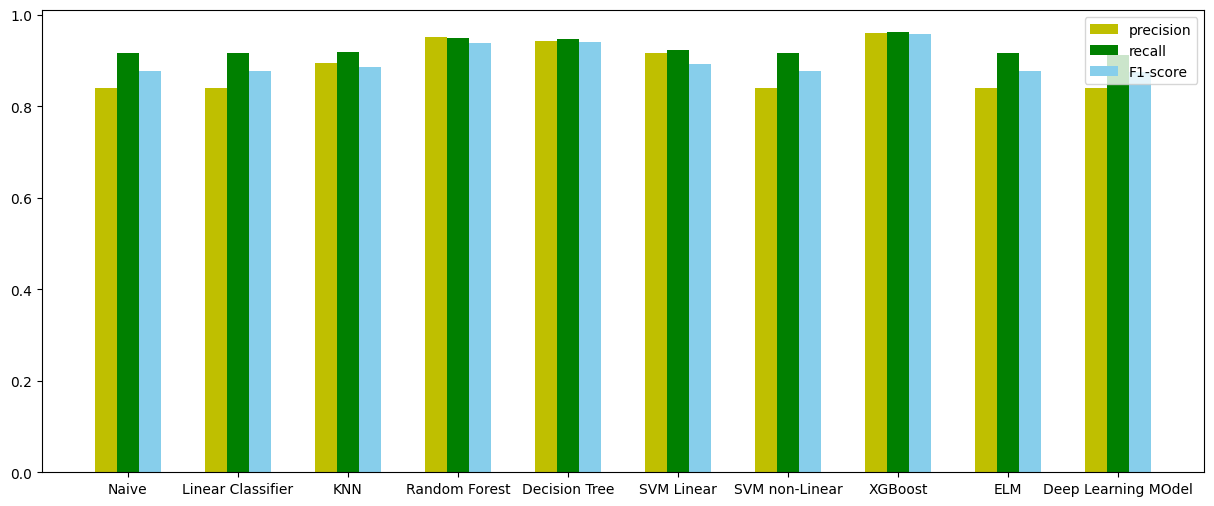

In [223]:
fig, ax = plt.subplots(figsize=(15,6))
x_pos = np.arange(len(accuracy))
bar_width = 0.2
ax.bar(x_pos,precision, width=bar_width, color='y')
ax.bar(x_pos+bar_width, recall, width=bar_width, color='g')
ax.bar(x_pos+2*bar_width, f1_score, width=bar_width, color='skyblue')

ax.set_xticks(x_pos+1*bar_width)
ax.set_xticklabels(models)
ax.legend(['precision','recall','F1-score'])

In [225]:
# Load the results dataframe
final_results = pd.DataFrame({
    'Classifier': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
})

In [227]:
final_results

,Classifier,Accuracy,Precision,Recall,F1-Score
0,Naive,0.916790,0.840505,0.916790,0.876992
1,Linear Classifier,0.916790,0.840505,0.916790,0.876992
2,KNN,0.918276,0.893977,0.918276,0.885735
3,Random Forest,0.947994,0.950786,0.947994,0.936892
4,Decision Tree,0.946508,0.941491,0.946508,0.939724
5,SVM Linear,0.922734,0.916032,0.922734,0.893083
6,SVM non-Linear,0.916790,0.840505,0.916790,0.876992
7,XGBoost,0.961367,0.960672,0.961367,0.956984
8,ELM,0.916790,0.840505,0.916790,0.876992
9,Deep Learning MOdel,0.912333,0.840163,0.912333,0.874762
